In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

# Data Cleaning

In [2]:
# Reading the data
loan = pd.read_csv("loan.csv")

In [3]:
# Viewing the first 5 rows to see how the data looks like
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Checking the count of rows and columns
loan.shape

(39717, 111)

#### It has been observed that there are lot of columns have missing values and unique values, exploring more to keep or drop them. Let's first do some cleanup of NULLs from rows and columns of the loan dataframe

In [6]:
c = loan.isnull().sum()
print(c)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


#### The total records in our data is 39,717. We would obviously do not need the columns that have all NULLs. Also, we observed that there are few columns having Nulls above 10K, but let us analyze those before dropping.

In [7]:
c.loc[(c.values > 10000) & (c.values < 39717)].sort_values()

desc                      12942
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

#### So, from the above observations we can safely drop all columns having above 10K NULL values as they will not be helpful in our analysis

In [8]:
loan.drop(columns=list(c[c.values > 10000].index), inplace=True)
loan.shape

(39717, 53)

#### Now we are left with 53 columns. Let's check if there are any columns with unique or single values in them.

In [9]:
column_unique = loan.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

#### It has been observed that the below columns have single value. We can safely drop them as they will not be helpful in our analysis

In [10]:
c1 = column_unique[column_unique.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [11]:
loan.drop(columns = list(c1.index), inplace=True)
loan.shape

(39717, 44)

#### Now we have 44 columns. 
- The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. Therefore, the fields that are created after a loan application is approved doesn't make any sense for our analysis. So we can safely remove the columns/variables corresponding to that scenario.
- Fields like id, member_id & url are different for each application. We can also drop the zip_code field as it contains only partial data which might impute our analysis negatively. We can also drop title and emp_title. Therefore, let us drop all the columns mentioned below.

In [12]:
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","title", "emp_title"]
loan.drop(columns=del_cols, inplace=True)
loan.shape

(39717, 26)

#### Now we are left with 26 columns

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [14]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,17.94,0,Jan-96,0,15,0,27783,53.90%,38,0.0


# Data Preparation

#### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans. Since loan status "Current" doesn't give any info for our analysis for approving or rejecting application, so we can safely drop the data.

In [15]:
loan = loan[loan.loan_status != "Current"]
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [16]:
loan.shape

(38577, 26)

#### Now we have 38577 records and 26 columns. Checking for any missing values.

In [17]:
(loan.isna().sum()/len(loan.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

#### Handling the missing values
 - Columns with missing values are "emp_length", "revol_util" and "pub_rec_bankruptcies". So before doing that, lets see what kind of data each column has.

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [19]:
print(loan.emp_length.mode()[0])
loan.emp_length.value_counts()

10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

#### The above emp_length counts shows that the mode value has far higher frequency than that of the next most frequent value. 
- So, from this we can safely assign the value of mode to the null values in the column. Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [20]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isna().sum()

0

# Data Standardization/Formatting
-  Formatting the data so that we can work with them using the right methods.

In [21]:
loan['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [22]:
loan['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

#### Let's remove % from the int_rate field


In [23]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [24]:
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [25]:
loan['revol_util'].value_counts()

revol_util
0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

#### Let's remove % from the revol_util field and convert to numeric

In [26]:
loan['revol_util'] = pd.Series(loan['revol_util']).str.replace('%', '').astype(float)
loan['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [27]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0


In [28]:
loan['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [29]:
loan['sub_grade'].value_counts()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

In [30]:
loan['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [31]:
loan['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [32]:
loan['issue_d'].value_counts()

issue_d
Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

#### Let's format the issue_d and add new columns like issued_year and issued_month which will be useful for our further analysis and safely drop this issue_d column.



In [33]:
loan['issue_d'].head()


0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [34]:
df_month_year = loan['issue_d'].str.partition("-", True)

In [35]:
loan['issue_month']=df_month_year[0]
loan['issue_year']='20' + df_month_year[2]

In [36]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,Jan-85,1,3,0,13648,83.7,9,0.0,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Apr-99,5,3,0,1687,9.4,4,0.0,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Nov-01,2,2,0,2956,98.5,10,0.0,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Feb-96,1,10,0,5598,21.0,37,0.0,Dec,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,Nov-04,3,9,0,7963,28.3,12,0.0,Dec,2011


In [37]:
loan.drop(columns=['issue_d'], inplace=True)

In [38]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,Jan-85,1,3,0,13648,83.7,9,0.0,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Apr-99,5,3,0,1687,9.4,4,0.0,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Nov-01,2,2,0,2956,98.5,10,0.0,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Feb-96,1,10,0,5598,21.0,37,0.0,Dec,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,Nov-04,3,9,0,7963,28.3,12,0.0,Dec,2011


In [39]:
loan['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [40]:
loan['addr_state'].value_counts()

addr_state
CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [41]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38527.000000,38577.000000,37880.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,48.702777,22.052648,0.043479
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,28.364741,11.425861,0.204583
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,25.200000,13.000000,0.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,49.100000,20.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,72.300000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000


# Outliers Treatment

<Axes: >

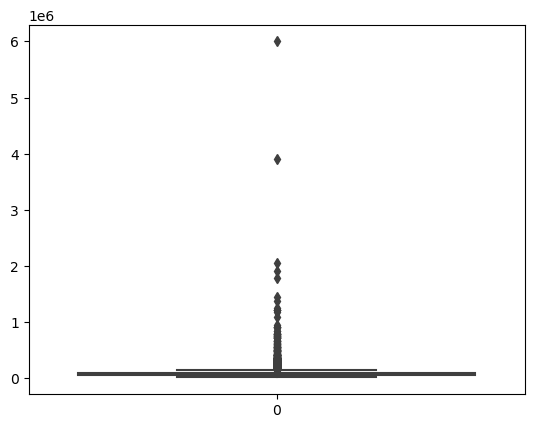

In [42]:
sns.boxplot(loan['annual_inc'])

#### Clearly indicating the presence of outliers.
- So, we can safely remove them.
- Let's see the quantile info and take an appropriate action.

In [43]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

#### The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation. So, considering the threshold limit for removing outliers as 0.955

In [44]:
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= per_95_annual_inc]

<Axes: >

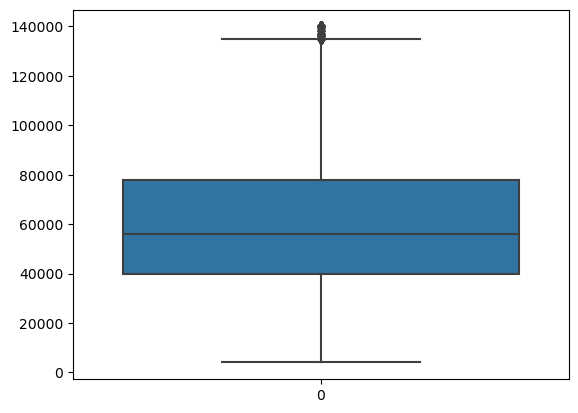

In [45]:
sns.boxplot(loan.annual_inc)

#### Now the "annual_inc" data looks good. Let's check for other numerical variables which might have outliers. For example, dti, loan_amnt and funded_amnt_inv.

<Axes: >

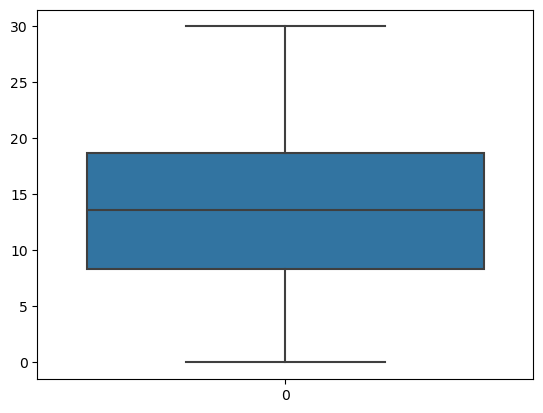

In [46]:
sns.boxplot(loan.dti)

<Axes: >

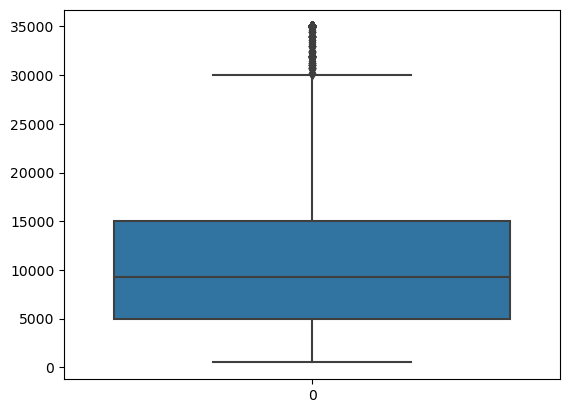

In [47]:
sns.boxplot(loan.loan_amnt)

<Axes: >

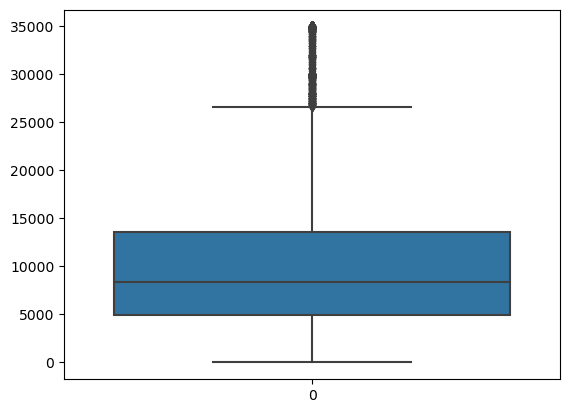

In [48]:
sns.boxplot(loan.funded_amnt_inv)

#### Here we see some outliers for both loan_amnt and funded_amnt_inv. Let's check the quantile info.

In [49]:
loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [50]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8375.000000
0.750    13623.731415
0.900    19750.000000
0.950    23941.875589
0.970    24975.000000
0.975    25350.000000
0.980    27950.000000
0.985    29925.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

#### Though there are some values far from distribution, the distribution is pretty continous and there is no need to remove outliers for the above columns.
#### Let's start with EDA

# EDA

### Univariate Analysis

#### Let's start by understanding the correlation between the different numeric fields and see if they are related (high correlation values)

In [51]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36606.000000,36654.000000,35996.000000
mean,10682.249550,10436.144077,9894.181349,11.888080,311.888682,60855.751621,13.446725,0.145032,0.864108,9.167294,0.056829,12312.872265,48.659741,21.641349,0.044699
std,7048.414166,6800.636737,6730.756232,3.667257,199.230096,27750.284125,6.661899,0.490184,1.064146,4.353165,0.240307,13768.342283,28.282836,11.232836,0.207317
min,500.000000,500.000000,0.000000,5.420000,15.690000,4000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5000.000000,5000.000000,4975.000000,8.940000,163.080000,40000.000000,8.350000,0.000000,0.000000,6.000000,0.000000,3554.000000,25.300000,13.000000,0.000000
50%,9250.000000,9000.000000,8375.000000,11.710000,270.420000,56000.000000,13.580000,0.000000,1.000000,8.000000,0.000000,8498.000000,49.000000,20.000000,0.000000
75%,15000.000000,14400.000000,13623.731415,14.270000,408.480000,77970.500000,18.710000,0.000000,1.000000,12.000000,0.000000,16156.750000,72.100000,28.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,140004.000000,29.990000,11.000000,8.000000,44.000000,4.000000,149000.000000,99.900000,90.000000,2.000000


#### The above fields are numerical variables/fields.

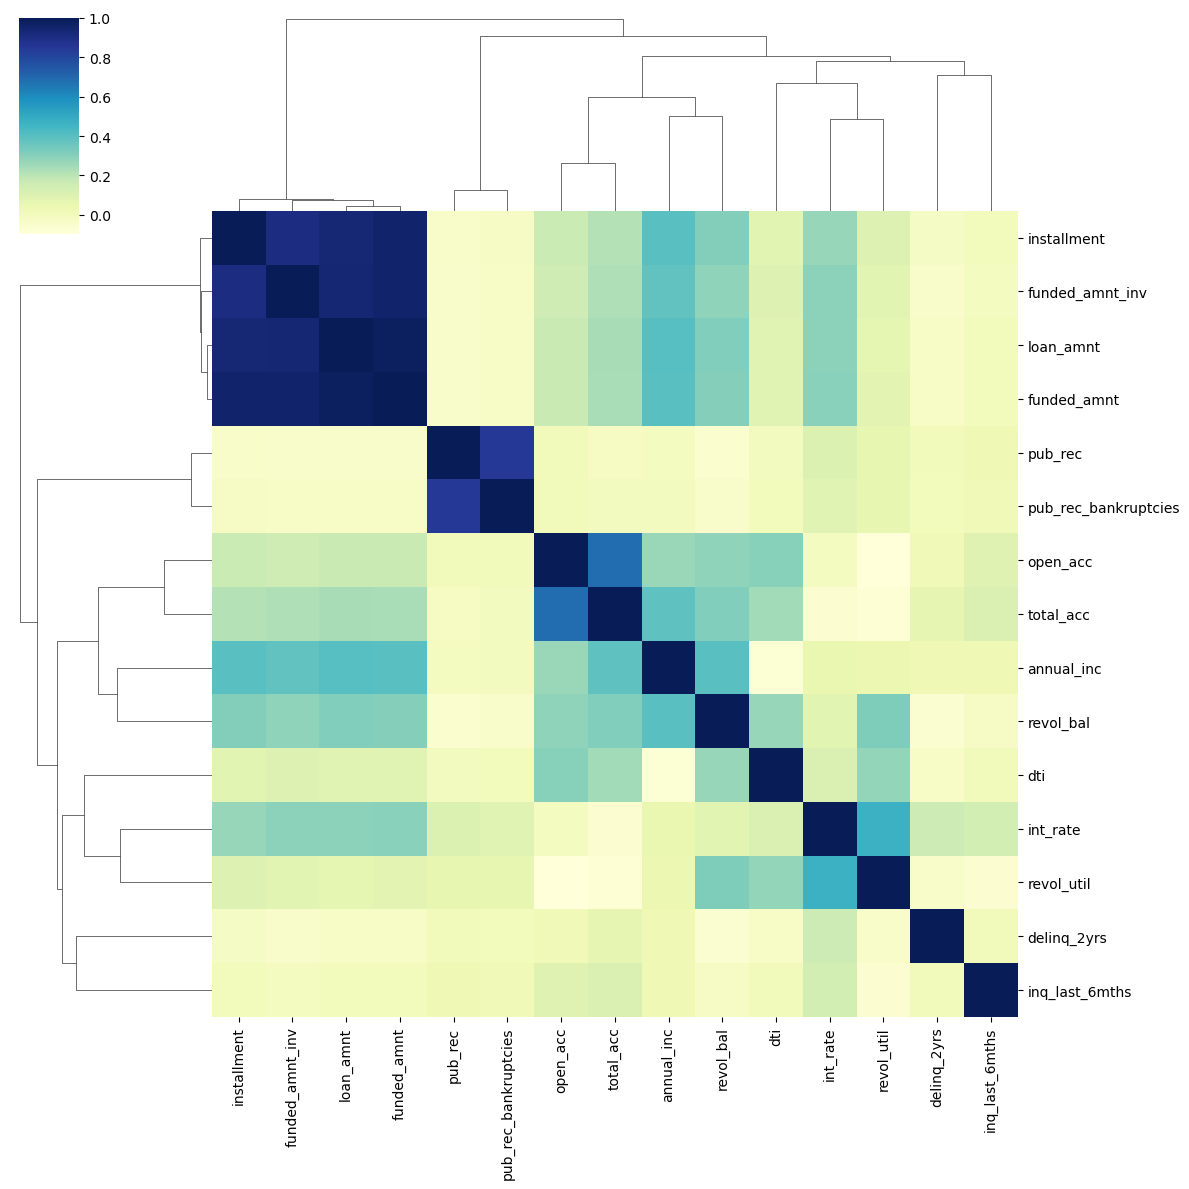

In [52]:
sns.clustermap(data=loan[["loan_amnt", "funded_amnt", "funded_amnt_inv",	"int_rate", "installment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "pub_rec_bankruptcies"]].corr(), cmap='YlGnBu', figsize=(12,12))
plt.show()

#### Here, we can clearly see loan_amnt, funded_amnt, funded_amnt_inv and installment have huge correlation as we know that darker the value heigher the correlation.  Next, the fields pub_rec & pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

### Loan status vs Numerical continuous variables

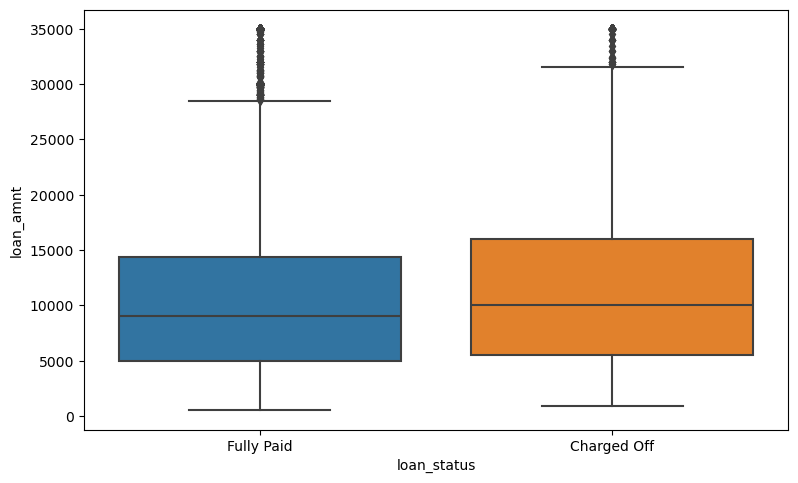

In [53]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)
plt.show()

In [54]:
loan['loan_amnt'].describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### We see that there is a huge difference between mean and median. let's check our data upto to 75%

In [55]:
loan_till75 = loan.loc[(loan['loan_amnt']<=15000)]

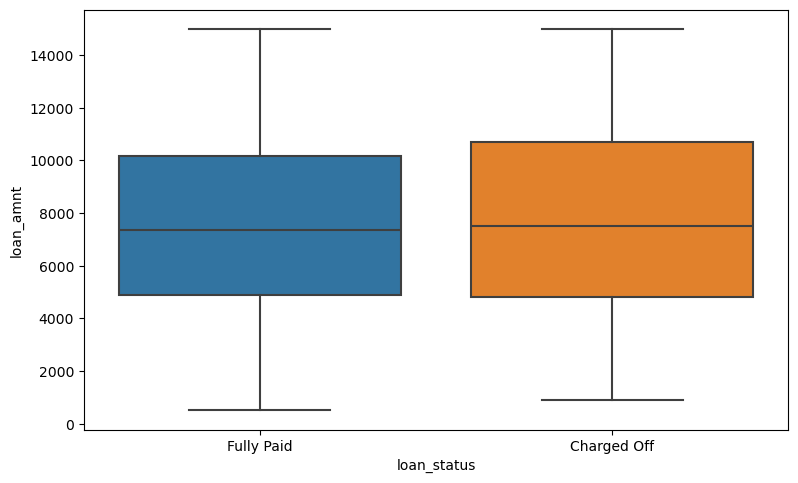

In [56]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till75)
plt.show()

#### Now, let's us take the data above 75%

In [57]:
loan_above75 = loan.loc[(loan['loan_amnt']>=15000)]

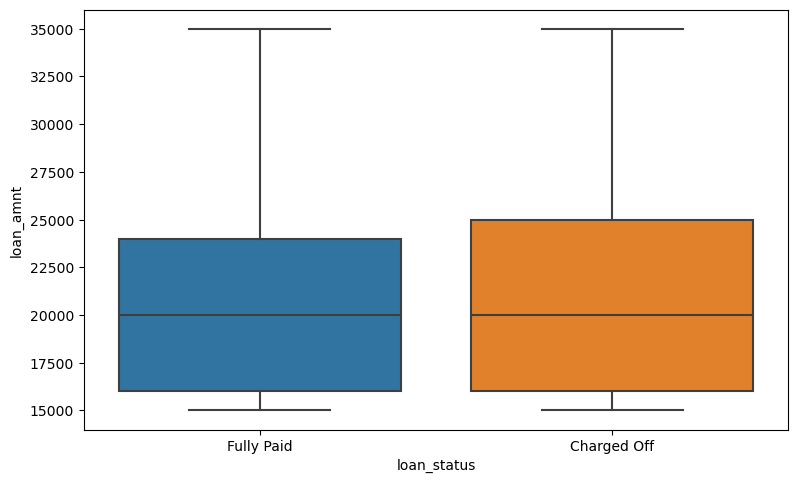

In [58]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above75)
plt.show()

#### Hence, from above box plot we can conclude that "higher the loan amount" will tend to "Write off"


### Segmented Univariate analysis

#### Let's create some bins for few numerical fields by using numpy nanpercentile function so that it will automatically cuts the data and create bins

In [59]:
labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
labels = [labels[p] + '(' +
              str(round(np.nanpercentile(loan['loan_amnt'], p * 20),2)) +
                ' - ' +
              str(round(np.nanpercentile(loan['loan_amnt'], (p+1) * 20),2)) 
               + ')'
              for p in range(5)]

loan['loan_amnt_bins'] = 	pd.qcut(loan['loan_amnt'], q=5, labels=labels)

In [60]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bins
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,1,3,0,13648,83.7,9,0.0,Dec,2011,Lower (4950.0 - 7500.0)
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,5,3,0,1687,9.4,4,0.0,Dec,2011,Lowest (500.0 - 4950.0)
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2,2,0,2956,98.5,10,0.0,Dec,2011,Lowest (500.0 - 4950.0)
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,1,10,0,5598,21.0,37,0.0,Dec,2011,Medium (7500.0 - 10500.0)
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,3,9,0,7963,28.3,12,0.0,Dec,2011,Lower (4950.0 - 7500.0)


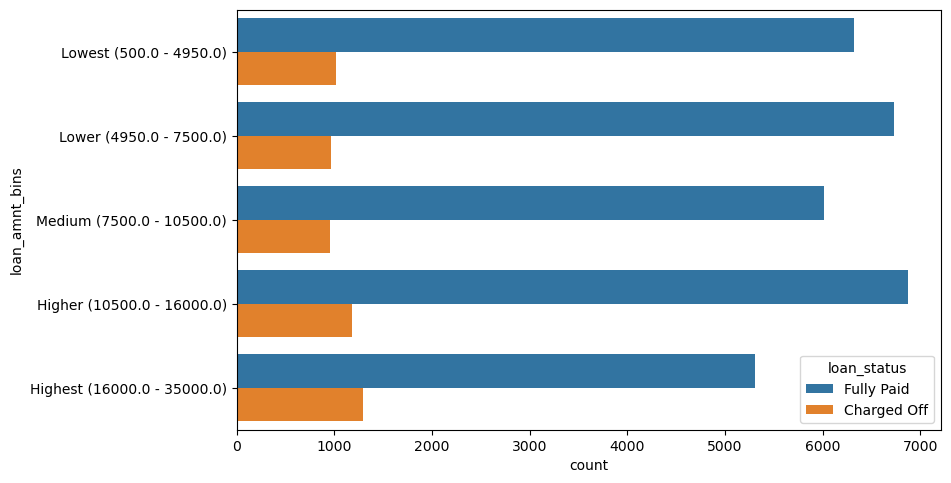

In [61]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'loan_amnt_bins', hue='loan_status', data = loan)
plt.show()

#### From the above graph, it has been observed that higher the loan amount, greater the chance of the loan getting default.

In [62]:
labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
labels = [labels[p] + '(' +
              str(round(np.nanpercentile(loan['int_rate'], p * 20),2)) + '%' +
                ' - ' +
              str(round(np.nanpercentile(loan['int_rate'], (p+1) * 20),2)) + '%'
               + ')'
              for p in range(5)]

loan['int_rate_bins'] = 	pd.qcut(loan['int_rate'], q=5, labels=labels)

In [63]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bins,int_rate_bins
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,3,0,13648,83.7,9,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lower (7.9% - 10.83%)
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,3,0,1687,9.4,4,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%)
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2,0,2956,98.5,10,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%)
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,10,0,5598,21.0,37,0.0,Dec,2011,Medium (7500.0 - 10500.0),Higher (12.73% - 15.2%)
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,9,0,7963,28.3,12,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lowest (5.42% - 7.9%)


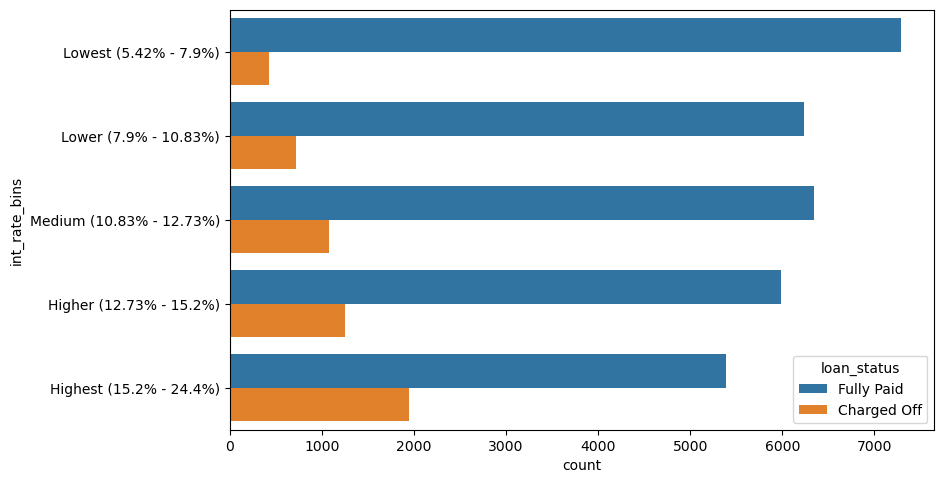

In [64]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'int_rate_bins', hue='loan_status', data = loan)
plt.show()

#### From the above graph, it has been observed that higher the interest rate leads to higher charged off.

In [65]:
labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
labels = [labels[p] + '(' +
              str(round(np.nanpercentile(loan['revol_util'], p * 20),2)) + '%' +
                ' - ' +
              str(round(np.nanpercentile(loan['revol_util'], (p+1) * 20),2)) + '%'
               + ')'
              for p in range(5)]

loan['revol_util_bins'] = 	pd.qcut(loan['revol_util'], q=5, labels=labels)

In [66]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bins,int_rate_bins,revol_util_bins
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0,13648,83.7,9,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lower (7.9% - 10.83%),Highest (77.1% - 99.9%)
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,0,1687,9.4,4,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Lowest (0.0% - 20.0%)
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0,2956,98.5,10,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Highest (77.1% - 99.9%)
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0,5598,21.0,37,0.0,Dec,2011,Medium (7500.0 - 10500.0),Higher (12.73% - 15.2%),Lower (20.0% - 39.8%)
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,0,7963,28.3,12,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lowest (5.42% - 7.9%),Lower (20.0% - 39.8%)


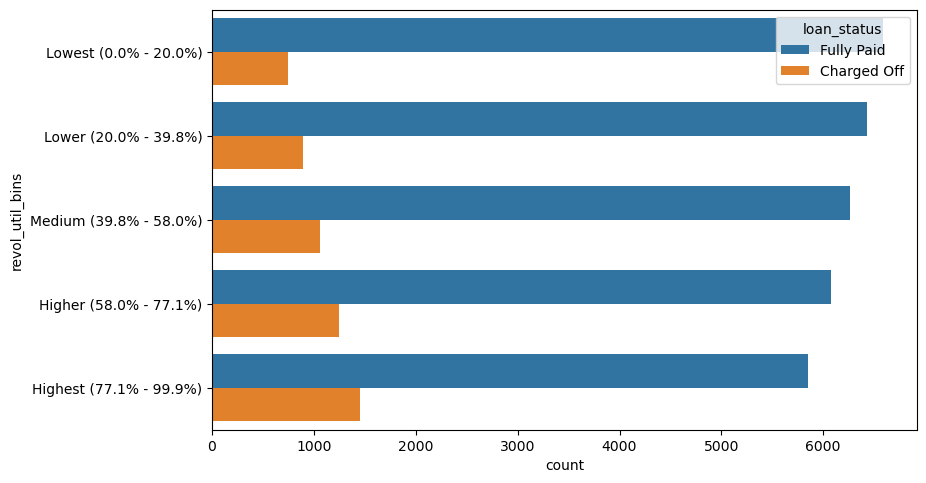

In [67]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'revol_util_bins', hue='loan_status', data = loan)
plt.show()

#### From the above graph, we can tell that the revolving line utilization rate has a large impact to the default chances.

In [68]:
labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
labels = [labels[p] + '(' +
              str(round(np.nanpercentile(loan['installment'], p * 20),2)) + 
                ' - ' +
              str(round(np.nanpercentile(loan['installment'], (p+1) * 20),2)) 
               + ')'
              for p in range(5)]

loan['installment_bins'] = 	pd.qcut(loan['installment'], q=5, labels=labels)

In [69]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bins,int_rate_bins,revol_util_bins,installment_bins
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,13648,83.7,9,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lower (7.9% - 10.83%),Highest (77.1% - 99.9%),Lower (145.19 - 222.22)
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1687,9.4,4,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Lowest (0.0% - 20.0%),Lowest (15.69 - 145.19)
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2956,98.5,10,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Highest (77.1% - 99.9%),Lowest (15.69 - 145.19)
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,5598,21.0,37,0.0,Dec,2011,Medium (7500.0 - 10500.0),Higher (12.73% - 15.2%),Lower (20.0% - 39.8%),Higher (320.95 - 463.09)
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,7963,28.3,12,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lowest (5.42% - 7.9%),Lower (20.0% - 39.8%),Lower (145.19 - 222.22)


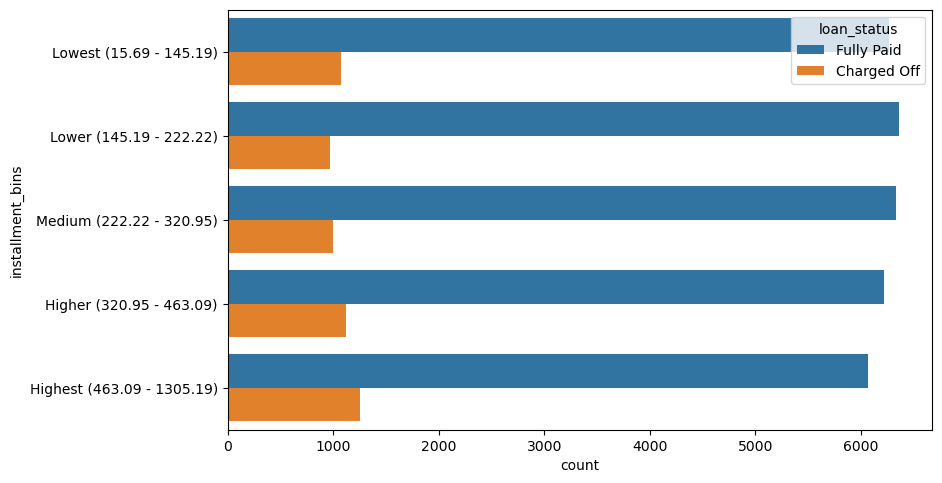

In [70]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'installment_bins', hue='loan_status', data = loan)
plt.show()

#### From the above graph, we can tell that higher installment amounts shows higher default chances.

In [71]:
labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
labels = [labels[p] + '(' +
              str(round(np.nanpercentile(loan['annual_inc'], p * 20),2)) + 
                ' - ' +
              str(round(np.nanpercentile(loan['annual_inc'], (p+1) * 20),2)) 
               + ')'
              for p in range(5)]

loan['annual_inc_bins'] = 	pd.qcut(loan['annual_inc'], q=5, labels=labels)

In [72]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bins,int_rate_bins,revol_util_bins,installment_bins,annual_inc_bins
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,83.7,9,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lower (7.9% - 10.83%),Highest (77.1% - 99.9%),Lower (145.19 - 222.22),Lowest (4000.0 - 36000.0)
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,9.4,4,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Lowest (0.0% - 20.0%),Lowest (15.69 - 145.19),Lowest (4000.0 - 36000.0)
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,98.5,10,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Highest (77.1% - 99.9%),Lowest (15.69 - 145.19),Lowest (4000.0 - 36000.0)
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,21.0,37,0.0,Dec,2011,Medium (7500.0 - 10500.0),Higher (12.73% - 15.2%),Lower (20.0% - 39.8%),Higher (320.95 - 463.09),Lower (36000.0 - 50000.0)
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,28.3,12,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lowest (5.42% - 7.9%),Lower (20.0% - 39.8%),Lower (145.19 - 222.22),Lowest (4000.0 - 36000.0)


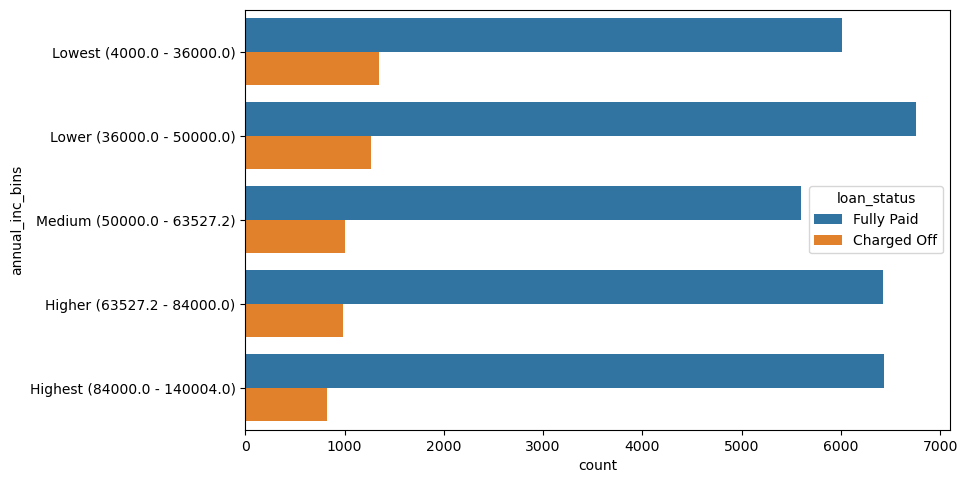

In [73]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'annual_inc_bins', hue='loan_status', data = loan)
plt.show()

#### From the above graph, we can tell that higher the income higher the repayment. Lower annual income (below 37K) will lead to higher default.

In [74]:
labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
labels = [labels[p] + '(' +
              str(round(np.nanpercentile(loan['dti'], p * 20),2)) + 
                ' - ' +
              str(round(np.nanpercentile(loan['dti'], (p+1) * 20),2)) 
               + ')'
              for p in range(5)]

loan['dti_bins'] = 	pd.qcut(loan['dti'], q=5, labels=labels)

In [75]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bins,int_rate_bins,revol_util_bins,installment_bins,annual_inc_bins,dti_bins
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,9,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lower (7.9% - 10.83%),Highest (77.1% - 99.9%),Lower (145.19 - 222.22),Lowest (4000.0 - 36000.0),Highest (19.86 - 29.99)
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,4,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Lowest (0.0% - 20.0%),Lowest (15.69 - 145.19),Lowest (4000.0 - 36000.0),Lowest (0.0 - 7.14)
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,10,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Highest (77.1% - 99.9%),Lowest (15.69 - 145.19),Lowest (4000.0 - 36000.0),Lower (7.14 - 11.6)
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,37,0.0,Dec,2011,Medium (7500.0 - 10500.0),Higher (12.73% - 15.2%),Lower (20.0% - 39.8%),Higher (320.95 - 463.09),Lower (36000.0 - 50000.0),Highest (19.86 - 29.99)
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,12,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lowest (5.42% - 7.9%),Lower (20.0% - 39.8%),Lower (145.19 - 222.22),Lowest (4000.0 - 36000.0),Lower (7.14 - 11.6)


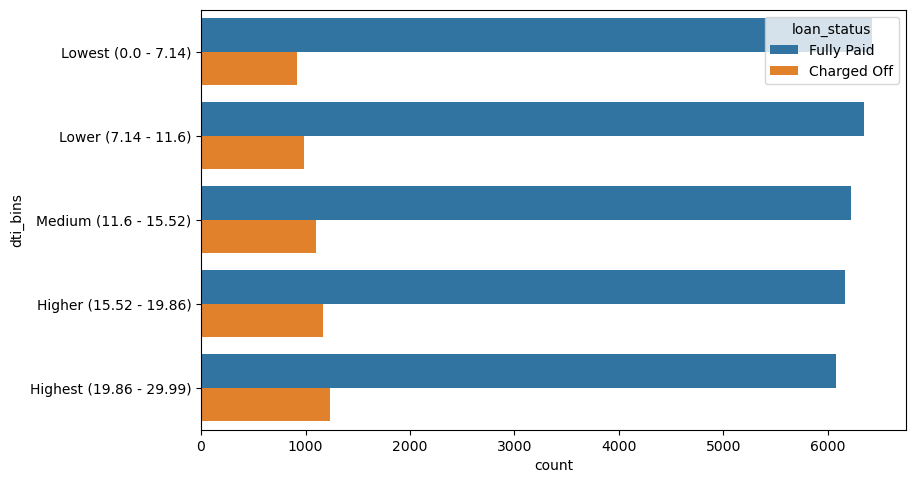

In [76]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'dti_bins', hue='loan_status', data = loan)
plt.show()

#### From the above graph, we can tell that higher DTI ( debt to income ratio) will lead to higher charged off.

In [77]:
labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
labels = [labels[p] + '(' +
              str(round(np.nanpercentile(loan['revol_bal'], p * 20),2)) + 
                ' - ' +
              str(round(np.nanpercentile(loan['revol_bal'], (p+1) * 20),2)) 
               + ')'
              for p in range(5)]

loan['revol_bal_bins'] = 	pd.qcut(loan['revol_bal'], q=5, labels=labels)

In [78]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bins,int_rate_bins,revol_util_bins,installment_bins,annual_inc_bins,dti_bins,revol_bal_bins
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lower (7.9% - 10.83%),Highest (77.1% - 99.9%),Lower (145.19 - 222.22),Lowest (4000.0 - 36000.0),Highest (19.86 - 29.99),Higher (10996.6 - 18592.4)
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Lowest (0.0% - 20.0%),Lowest (15.69 - 145.19),Lowest (4000.0 - 36000.0),Lowest (0.0 - 7.14),Lowest (0.0 - 2724.6)
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Highest (77.1% - 99.9%),Lowest (15.69 - 145.19),Lowest (4000.0 - 36000.0),Lower (7.14 - 11.6),Lower (2724.6 - 6333.0)
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0.0,Dec,2011,Medium (7500.0 - 10500.0),Higher (12.73% - 15.2%),Lower (20.0% - 39.8%),Higher (320.95 - 463.09),Lower (36000.0 - 50000.0),Highest (19.86 - 29.99),Lower (2724.6 - 6333.0)
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lowest (5.42% - 7.9%),Lower (20.0% - 39.8%),Lower (145.19 - 222.22),Lowest (4000.0 - 36000.0),Lower (7.14 - 11.6),Medium (6333.0 - 10996.6)


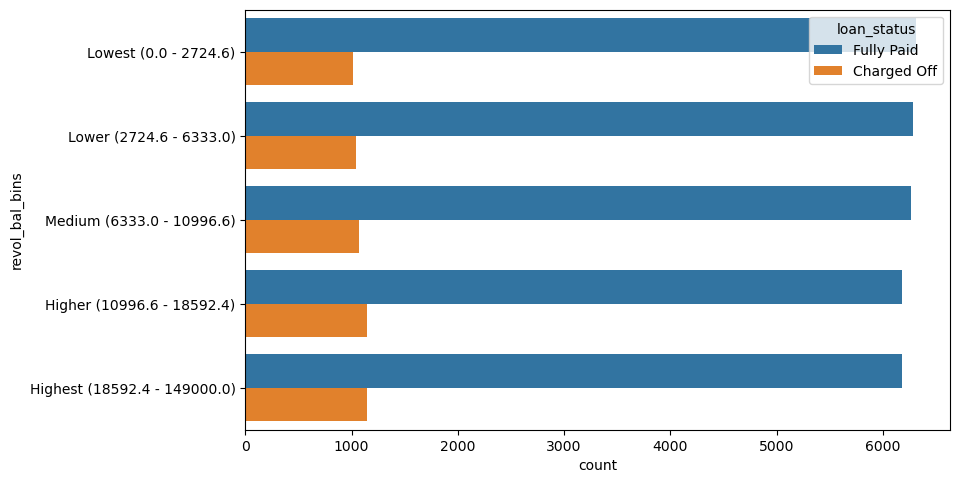

In [79]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'revol_bal_bins', hue='loan_status', data = loan)
plt.show()

#### From the above graph, we can tell that higher the revolving balance, bigger the chance of the loan getting defaulted.

### Loan status vs Categorical variables

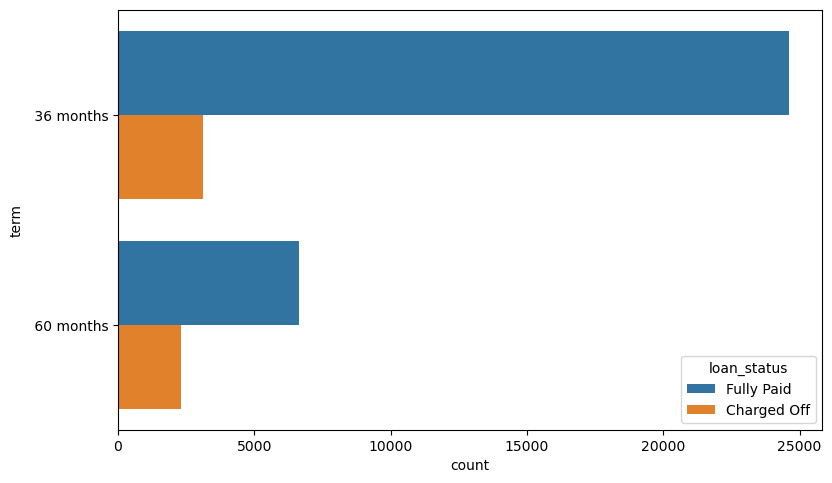

In [80]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'term', hue='loan_status', data = loan)
plt.show()

#### Here loan repayment term plays a factor in judging the default rate.

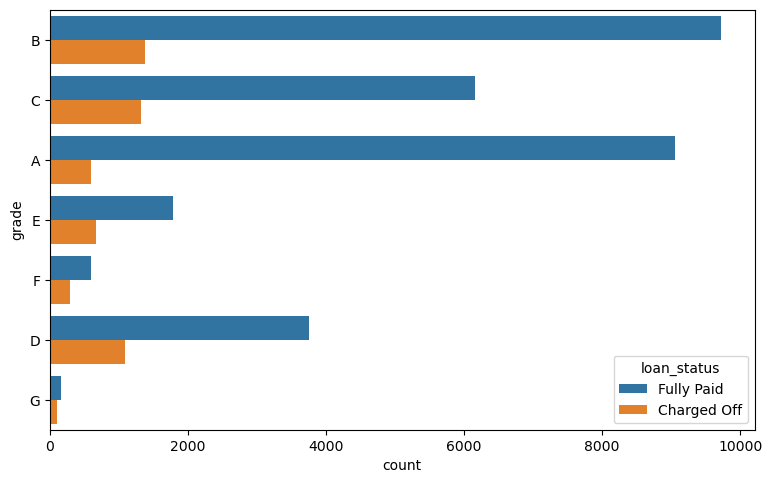

In [81]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'grade', hue='loan_status', data = loan)
plt.show()

#### From the above graph, we can clearly see that loan grades having highest default percentages are D, E, F, G when compared to others.

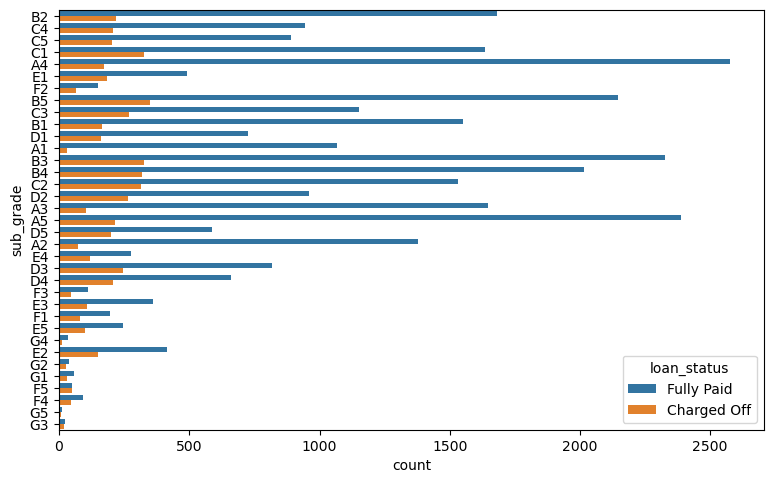

In [82]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'sub_grade', hue='loan_status', data = loan)
plt.show()

#### From the above graph, we can tell that G3 and F5 sub grades have higher default rate when compared to others.

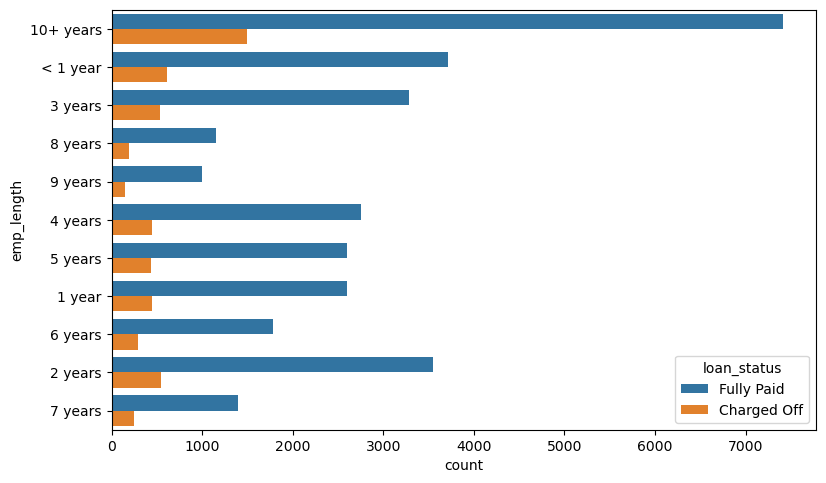

In [83]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'emp_length', hue='loan_status', data = loan)
plt.show()

#### From the above graph, although there is nothing much to conclude from above data, we can see having no employment will lead to Defaulted payment



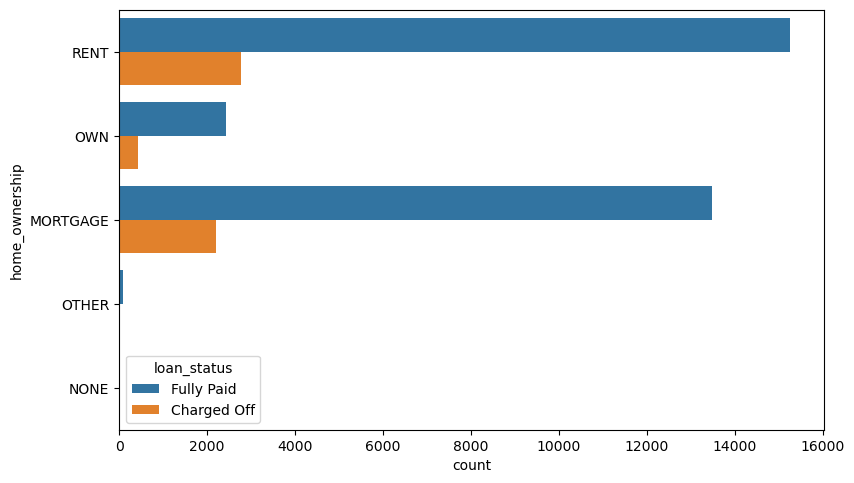

In [84]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'home_ownership', hue='loan_status', data = loan)
plt.show()

#### From the above graph, we can say that we don't have much info to conclude as it says "OTHER" and "NONE"

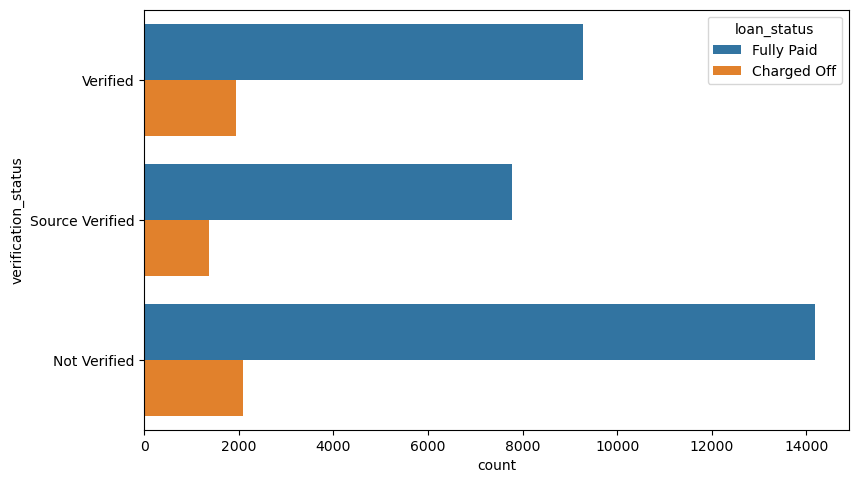

In [85]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'verification_status', hue='loan_status', data = loan)
plt.show()

#### From the above graph, interestingly verified applicants have more defaulted which means the verification process is not correct. Seems, LendingClub needs to strengthen their verification process.

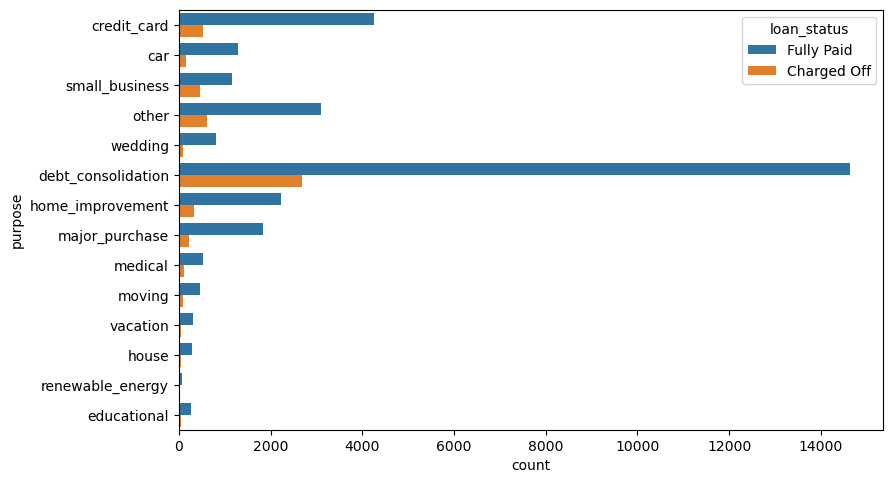

In [86]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y = 'purpose', hue='loan_status', data = loan)
plt.show()

#### From the above analysis it is evidend that the loans taken for small_business, renewable_energy and educational are the riskier ones.

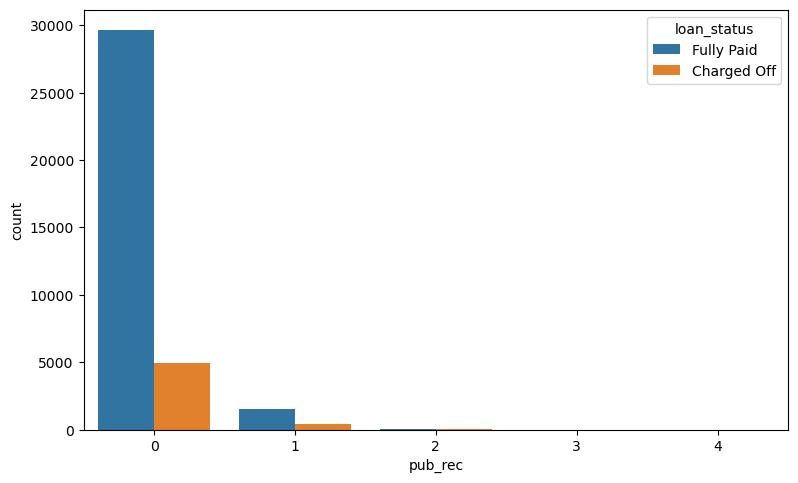

In [87]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(x = 'pub_rec', hue='loan_status', data = loan)
plt.show()

#### From the above graph, it clearly shows that individuals with 1 or 2 derogatory public records have higher chances of charged off



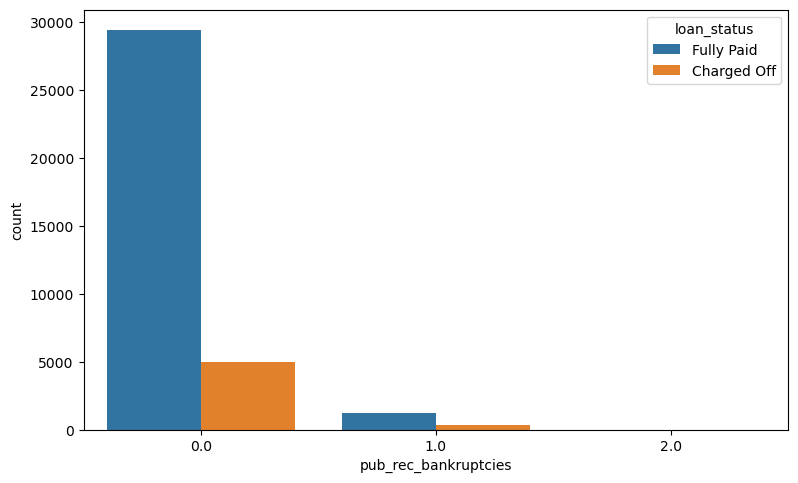

In [88]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(x = 'pub_rec_bankruptcies', hue='loan_status', data = loan)
plt.show()

#### From the above graph, we can say higher the number of public bankruptcy records, bigger the chance of defaulting the loan.

<Axes: xlabel='issue_year', ylabel='count'>

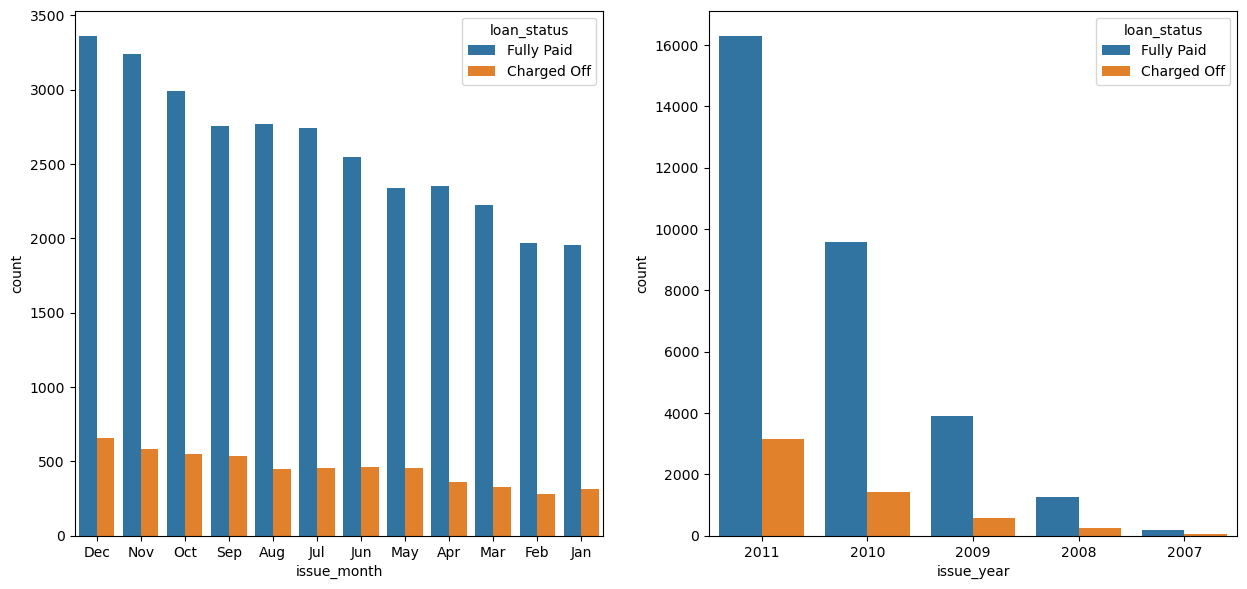

In [89]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', hue='loan_status', data=loan)
plt.subplot(222)
sns.countplot(x='issue_year', hue='loan_status', data=loan)

#### We can clearly see December is the month which has the highest number of loan applications per year and also have the biggest default ratio. Month of May is also another one.

### Bivariate Analysis

#### Now that we have analyzed each of the variables and its impact on the loan-status, let us take group of variables together and analyze their combined effect on the loan-status.These categories are based on our business understanding.

In [90]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bins,int_rate_bins,revol_util_bins,installment_bins,annual_inc_bins,dti_bins,revol_bal_bins
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lower (7.9% - 10.83%),Highest (77.1% - 99.9%),Lower (145.19 - 222.22),Lowest (4000.0 - 36000.0),Highest (19.86 - 29.99),Higher (10996.6 - 18592.4)
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Lowest (0.0% - 20.0%),Lowest (15.69 - 145.19),Lowest (4000.0 - 36000.0),Lowest (0.0 - 7.14),Lowest (0.0 - 2724.6)
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.0,Dec,2011,Lowest (500.0 - 4950.0),Highest (15.2% - 24.4%),Highest (77.1% - 99.9%),Lowest (15.69 - 145.19),Lowest (4000.0 - 36000.0),Lower (7.14 - 11.6),Lower (2724.6 - 6333.0)
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0.0,Dec,2011,Medium (7500.0 - 10500.0),Higher (12.73% - 15.2%),Lower (20.0% - 39.8%),Higher (320.95 - 463.09),Lower (36000.0 - 50000.0),Highest (19.86 - 29.99),Lower (2724.6 - 6333.0)
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,0.0,Dec,2011,Lower (4950.0 - 7500.0),Lowest (5.42% - 7.9%),Lower (20.0% - 39.8%),Lower (145.19 - 222.22),Lowest (4000.0 - 36000.0),Lower (7.14 - 11.6),Medium (6333.0 - 10996.6)


#### Installment vs Annual Inc Groups

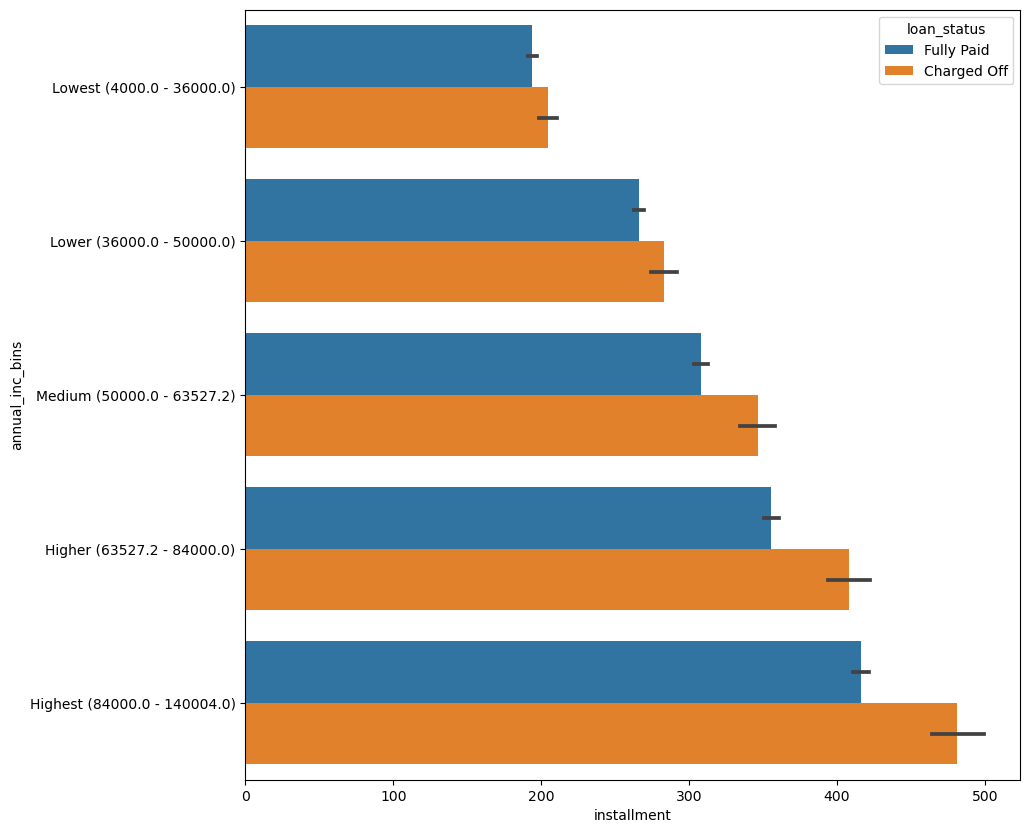

In [91]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='installment', y='annual_inc_bins', hue ='loan_status')
plt.show()

#### The above figure shows that for higher installments for any income group have more number of defaults.

#### Annual Inc vs Purpose

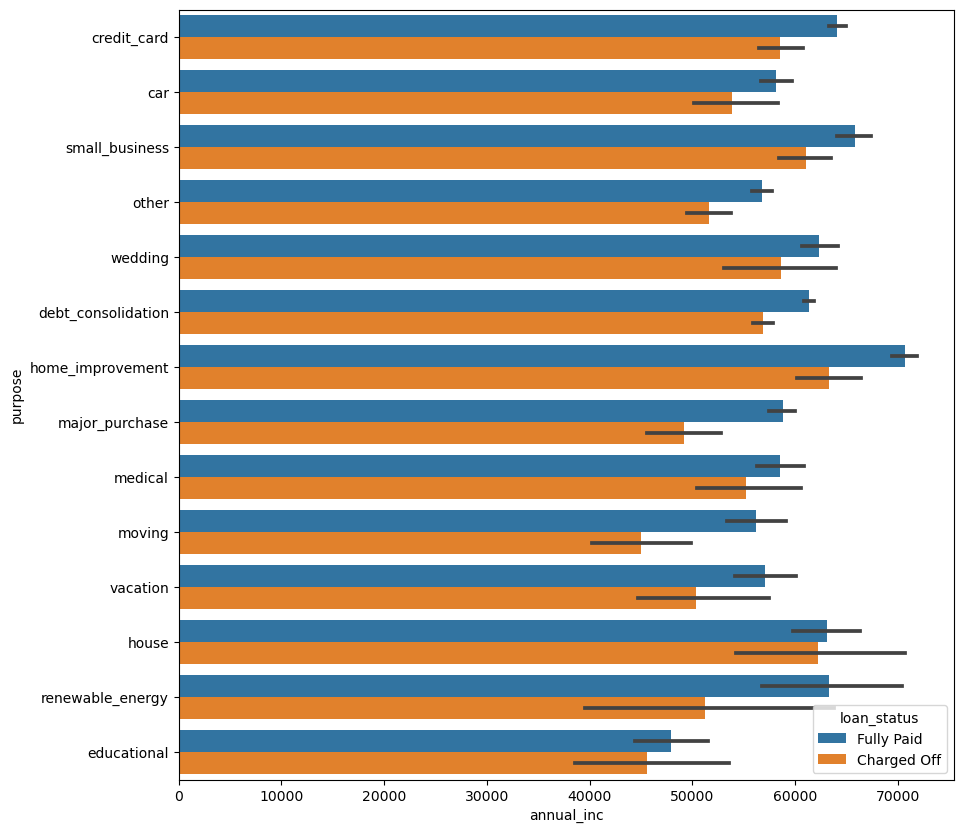

In [92]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. 
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

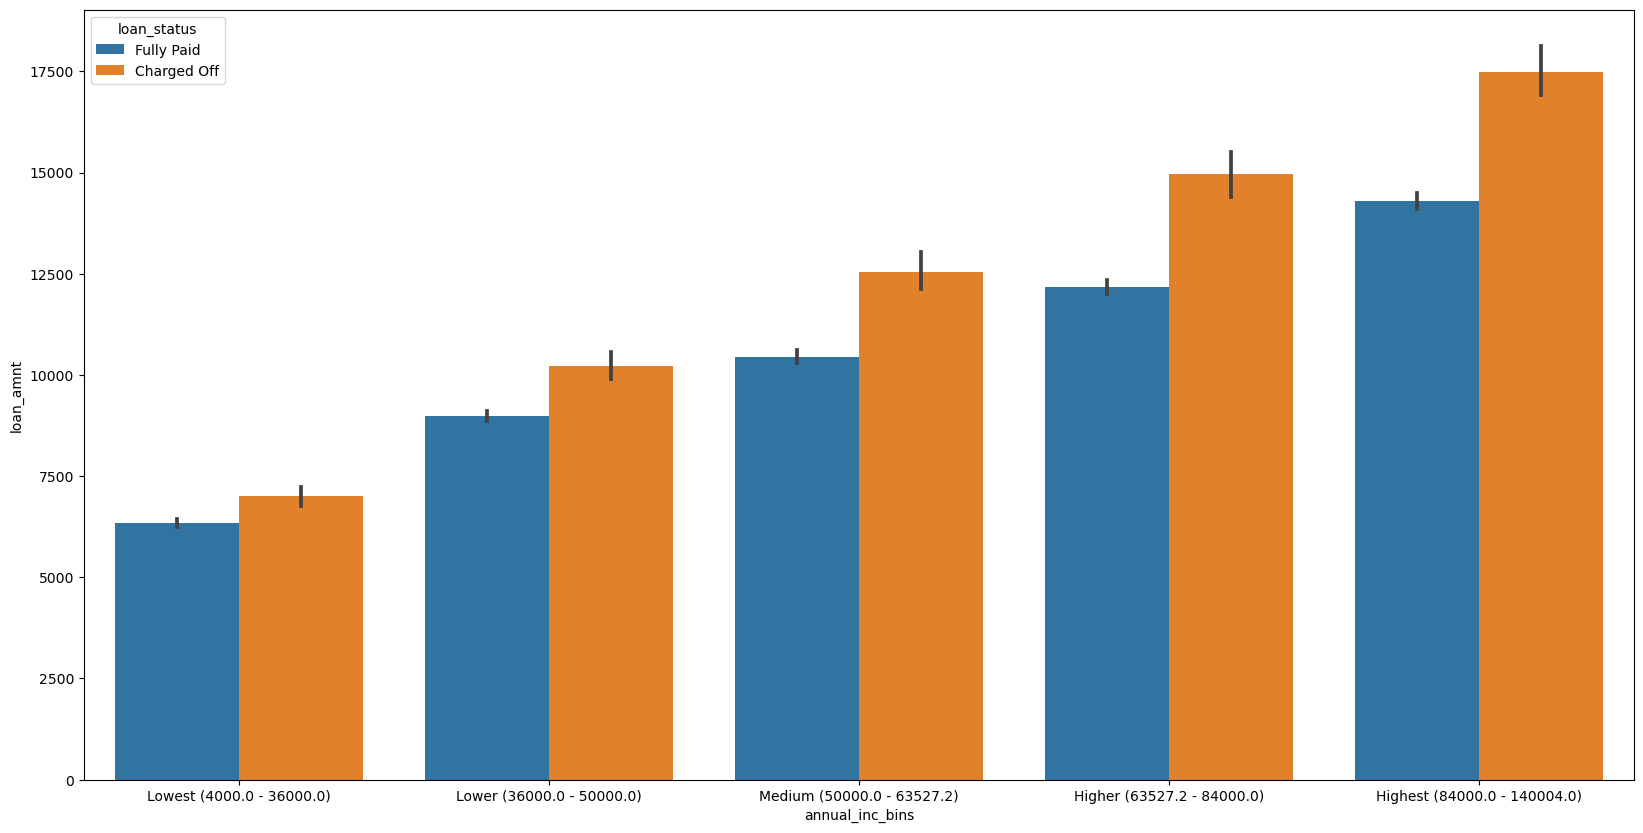

In [93]:
plt.figure(figsize=(20,10))
sns.barplot(data =loan,x='annual_inc_bins', y='loan_amnt', hue ='loan_status')
plt.show()

#### From the above graph, we can tell across all the income groups, the loan_amount is higher for people who defaulted.

In [94]:
# Creating a loan_status_num numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)


<Axes: xlabel='dti_bins', ylabel='annual_inc_bins'>

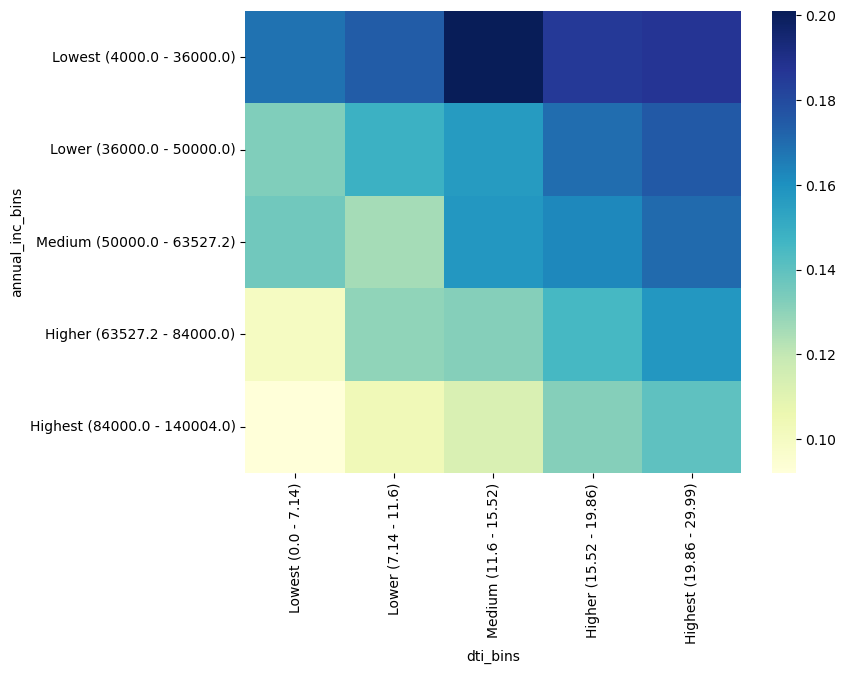

In [95]:
fig, ax = plt.subplots(figsize=(8,6))
pt = pd.pivot_table(data=loan, values='loan_status_num', index='annual_inc_bins', columns='dti_bins')
sns.heatmap(pt, ax=ax, cmap='YlGnBu')

#### Medium debt-to-income group in the lowest income range is the most risky when it comes to loan repayment.

<Figure size 10000x10000 with 0 Axes>

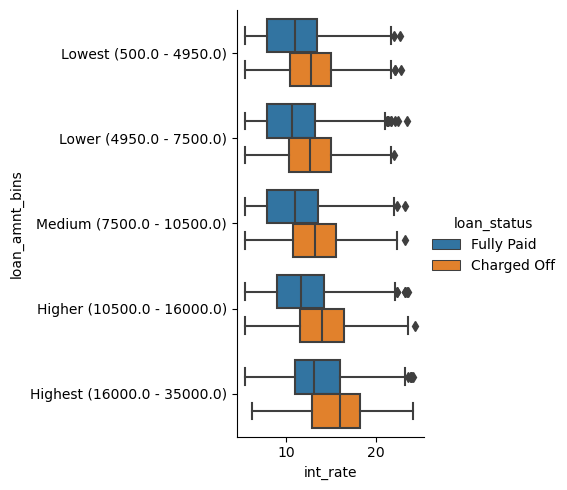

In [96]:
plt.figure(figsize=(100,100))
plt.tight_layout()
sns.catplot(data =loan, x ='int_rate', y ='loan_amnt_bins', hue ='loan_status', kind = 'box')

#### From the above graph, the interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. This can be a pretty strong driving factor for loan defaulting.

# Insights

#### Finally, we come to an end of the EDA of the loan data set and finding some of the drivers for loan default. There might be some more drivers; however according to me below are my observations for the most impactful drivers.
- Higher the loan amount (above 16K) will lead to higher default.
- Higher the installment amount (above 327) will lead to higher default.
- Higher the interest rate above 13% will lead to higher default.
- Lower annual income (below 37K) will lead to higher default.
- Higher debt to income ratio (above 15%) will lead to higher default.
- Loan issue month is in Dec, May, Sep.
- Higherevolving utilization rate above 58%ve 10k, bigger the chance of the loan getting defa
- Higher the revolving balance above 10k, bigger the chance of the loan getting defaulted.ulted.
- Repayment term (5 years).
- Loan Grades from D, E, F and G when compared to others.
- Loan sub grades G3 and F5 when compared to others.
- Missing employment record will lead to default.
- Loan purpose like small business, renewable energy, educational.
- Derogatory public records with (1 or 2) have the chance of defaulting the loan.
- Higher the number of public bankruptcy records, bigger the chance of defaulting the loan.
- Higher installments for any income group have more number of defaults.
- Across all the income groups, the loan_amount is higher for people who defaulted.
- Medium debt- to- income group in the lowest income range is the most risky when it comes to loan repayment.
- Interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.an_amount groups.